In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


In [180]:
titanic = pd.read_csv('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
#(Parents/children aboard), and Fare to predict whether a passenger survived.

In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [181]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [182]:
titanic.Age.mean(), titanic.Age.median()

(29.69911764705882, 28.0)

In [183]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Age'>

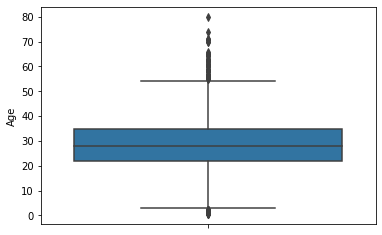

In [24]:
sns.boxplot(y='Age', data=titanic)
#We can see few Outliers with the Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

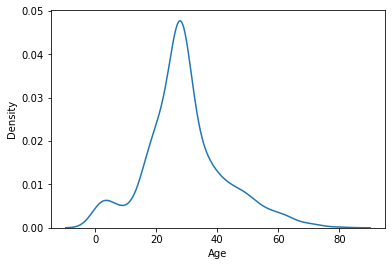

In [26]:
sns.kdeplot(x='Age', data=titanic)

In [184]:
titanic['Age'].fillna(titanic.Age.median(), inplace=True)

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [29]:
titanic['Embarked'].value_counts()
#since there are only two missing values, I have two options
# remove missing two rows.
# replace missing values with the most embarked station

#Since Embarked is being used for only for EDA purposes in this assignment, I would go with option 2

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [185]:
titanic['Embarked'].fillna('S', inplace=True)

In [186]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<AxesSubplot:xlabel='Embarked', ylabel='count'>

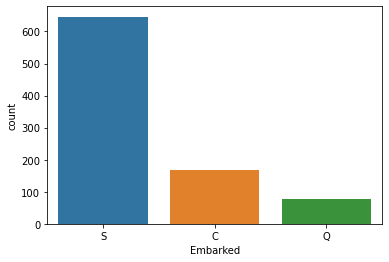

In [33]:
sns.countplot(x='Embarked',data=titanic)

<AxesSubplot:xlabel='Embarked'>

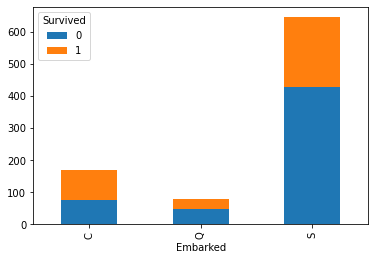

In [41]:
em_su = pd.crosstab(titanic['Embarked'], titanic['Survived'])
em_su.plot.bar(stacked=True)

In [187]:
embarked_s = titanic.loc[titanic['Embarked']=='S']
embarked_c = titanic.loc[titanic['Embarked']=='C']
embarked_q = titanic.loc[titanic['Embarked']=='Q']

In [188]:
s_survived = embarked_s.Survived.count()/titanic.Survived.count()
c_survived = embarked_c.Survived.count()/titanic.Survived.count()
q_survived = embarked_q.Survived.count()/titanic.Survived.count()

In [189]:
data = {'Embarked':['S','C','Q'],
        'Survived':[s_survived, c_survived, q_survived]}

In [190]:
pd.DataFrame(data)

,Embarked,Survived
0,S,0.725028
1,C,0.188552
2,Q,0.086420


In [67]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [191]:
class_1 = titanic.loc[titanic['Pclass']==1][['Embarked','Survived']]
class_2 = titanic.loc[titanic['Pclass']==2][['Embarked','Survived']]
class_3 = titanic.loc[titanic['Pclass']==3][['Embarked','Survived']]

In [192]:
survived_class_1 = class_1.Survived.count()/titanic.Survived.count()
survived_class_2 = class_2.Survived.count()/titanic.Survived.count()
survived_class_3 = class_3.Survived.count()/titanic.Survived.count()

In [193]:
class_data = {'Class':['1','2','3'],
        'Survived':[survived_class_1, survived_class_2, survived_class_3]}

<AxesSubplot:xlabel='Embarked'>

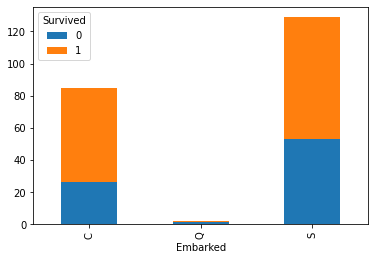

In [81]:
pd.crosstab(class_1['Embarked'], class_1['Survived']).plot.bar(stacked=True)

In [111]:
survival_embarked_class = titanic[['Pclass','Embarked','Survived']]

In [113]:
survival_embarked_class.sort_values(by='Pclass')

,Pclass,Embarked,Survived
445,1,S,1
310,1,C,1
309,1,C,1
307,1,C,1
306,1,C,1
...,...,...,...
379,3,S,0
381,3,C,1
382,3,S,0
371,3,S,0


In [115]:
pd.pivot_table(survival_embarked_class, index=['Pclass'], values='Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [117]:
pd.pivot_table(survival_embarked_class, index=['Pclass','Embarked'], values='Survived')

Survived
Pclass Embarked          
1      C         0.694118
       Q         0.500000
       S         0.589147
2      C         0.529412
       Q         0.666667
       S         0.463415
3      C         0.378788
       Q         0.375000
       S         0.189802

In [119]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [195]:
titanic['Sex'] = titanic['Sex'].map({'female':0, 'male':1})

In [160]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='count'>

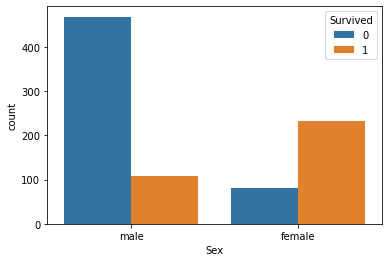

In [194]:
sns.countplot(x='Sex', data=titanic, hue='Survived')
#0 for female, 1 for male

<AxesSubplot:xlabel='Age', ylabel='Density'>

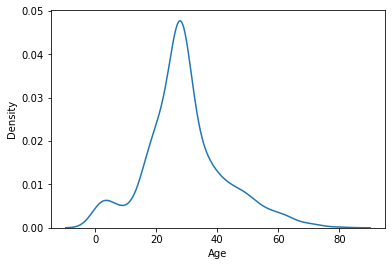

In [164]:
sns.kdeplot(x='Age', data=titanic)

C:\Users\Abhiram Challapalli\.conda\envs\tf-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


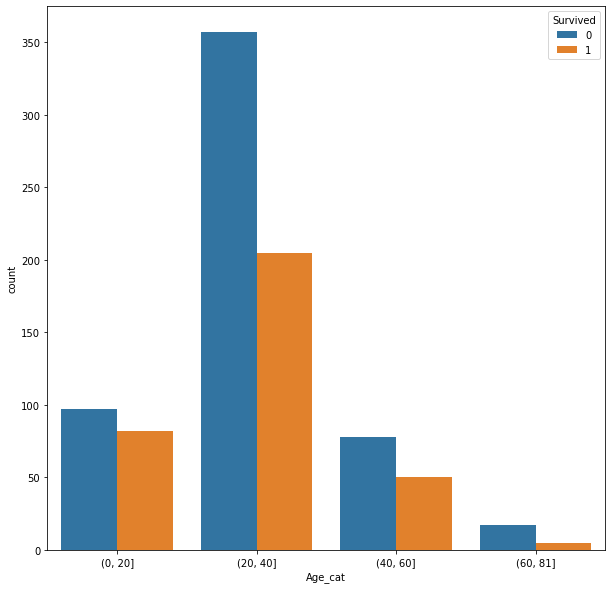

In [196]:
titanic['Age_cat'] = pd.cut(titanic['Age'], bins=[0,20,40,60,81])
plt.subplots(figsize=(10,8))
sns.countplot('Age_cat',hue='Survived',data=titanic)
plt.show()

In [127]:
x=titanic[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare']]
y=titanic['Survived']

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [131]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test, y_test)

0.7541899441340782

In [137]:
grid_params = {'criterion':['gini', 'entropy'],
                'max_depth': range(2,31,1),
              'splitter':['best','random']}

In [138]:
grid = GridSearchCV(tree, cv=5, param_grid=grid_params, verbose=2)

In [139]:
grid.fit(x_train, y_train)
grid.score(x_test, y_test)

Fitting 5 folds for each of 116 candidates, totalling 580 fits
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=random ....................
[CV] ..... criterion=gini, max_depth=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=random ....................
[CV] ..... cri

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....... criterion=gini, max_depth=7, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV] ..... criterion=gini, max_depth=7, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV] ..... criterion=gini, max_depth=7, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV] ..... criterion=gini, max_depth=7, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV] ..... criterion=gini, max_depth=7, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=7, splitter=random ....................
[CV] ..... criterion=gini, max_depth=7, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=8, splitter=best ......................
[CV] ....... criterion=gini, max_depth=8, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=8, splitter=best ......................
[CV] .

[CV] .... criterion=gini, max_depth=17, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=18, splitter=best .....................
[CV] ...... criterion=gini, max_depth=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=18, splitter=best .....................
[CV] ...... criterion=gini, max_depth=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=18, splitter=best .....................
[CV] ...... criterion=gini, max_depth=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=18, splitter=best .....................
[CV] ...... criterion=gini, max_depth=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=18, splitter=best .....................
[CV] ...... criterion=gini, max_depth=18, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=18, splitter=random ...................
[CV] .... criterion=gini, max_depth=18, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=18, splitter=random ...................
[CV] .

[CV] ...... criterion=gini, max_depth=28, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=random ...................
[CV] .... criterion=gini, max_depth=28, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=random ...................
[CV] .... criterion=gini, max_depth=28, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=random ...................
[CV] .... criterion=gini, max_depth=28, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=random ...................
[CV] .... criterion=gini, max_depth=28, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=random ...................
[CV] .... criterion=gini, max_depth=28, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=29, splitter=best .....................
[CV] ...... criterion=gini, max_depth=29, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=29, splitter=best .....................
[CV] .

[CV] ... criterion=entropy, max_depth=10, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, splitter=best ..................
[CV] ... criterion=entropy, max_depth=10, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, splitter=best ..................
[CV] ... criterion=entropy, max_depth=10, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, splitter=best ..................
[CV] ... criterion=entropy, max_depth=10, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, splitter=best ..................
[CV] ... criterion=entropy, max_depth=10, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=10, splitter=random ................
[CV] . criterion=entropy, max_depth=10, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, splitter=random ................
[CV] . criterion=entropy, max_depth=10, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=10, splitter=random ................
[CV] .

[CV] criterion=entropy, max_depth=18, splitter=random ................
[CV] . criterion=entropy, max_depth=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=18, splitter=random ................
[CV] . criterion=entropy, max_depth=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=18, splitter=random ................
[CV] . criterion=entropy, max_depth=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=18, splitter=random ................
[CV] . criterion=entropy, max_depth=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=18, splitter=random ................
[CV] . criterion=entropy, max_depth=18, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=19, splitter=best ..................
[CV] ... criterion=entropy, max_depth=19, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=19, splitter=best ..................
[CV] ... criterion=entropy, max_depth=19, splitter=best, total=   0.0s
[CV] c

[CV] ... criterion=entropy, max_depth=26, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=26, splitter=best ..................
[CV] ... criterion=entropy, max_depth=26, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=26, splitter=best ..................
[CV] ... criterion=entropy, max_depth=26, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=26, splitter=best ..................
[CV] ... criterion=entropy, max_depth=26, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=26, splitter=best ..................
[CV] ... criterion=entropy, max_depth=26, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=26, splitter=random ................
[CV] . criterion=entropy, max_depth=26, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=26, splitter=random ................
[CV] . criterion=entropy, max_depth=26, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=26, splitter=random ................
[CV] .

[Parallel(n_jobs=1)]: Done 580 out of 580 | elapsed:    2.2s finished


0.7988826815642458

In [141]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}

In [147]:
grid.best_score_

0.8258150300403821

In [148]:
print(classification_report(y_test, grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [150]:
#After Scaled

In [151]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [152]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [153]:
dt.score(x_test, y_test)

0.7486033519553073

In [154]:
grid = GridSearchCV(dt, cv=5, param_grid=grid_params, verbose=2)

In [156]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=best ......................
[CV] ....... criterion=gini, max_depth=2, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=random ....................
[CV] ..... criterion=gini, max_depth=2, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=2, splitter=random ....................
[CV] ..... cri

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... criterion=gini, max_depth=10, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, splitter=random ...................
[CV] .... criterion=gini, max_depth=10, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=10, splitter=random ...................
[CV] .... criterion=gini, max_depth=10, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=11, splitter=best .....................
[CV] ...... criterion=gini, max_depth=11, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, splitter=best .....................
[CV] ...... criterion=gini, max_depth=11, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, splitter=best .....................
[CV] ...... criterion=gini, max_depth=11, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, splitter=best .....................
[CV] ...... criterion=gini, max_depth=11, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=11, splitter=best .....................
[CV] .

[CV] ...... criterion=gini, max_depth=19, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=19, splitter=random ...................
[CV] .... criterion=gini, max_depth=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=19, splitter=random ...................
[CV] .... criterion=gini, max_depth=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=19, splitter=random ...................
[CV] .... criterion=gini, max_depth=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=19, splitter=random ...................
[CV] .... criterion=gini, max_depth=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=19, splitter=random ...................
[CV] .... criterion=gini, max_depth=19, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=20, splitter=best .....................
[CV] ...... criterion=gini, max_depth=20, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=20, splitter=best .....................
[CV] .

[CV] ...... criterion=gini, max_depth=28, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=best .....................
[CV] ...... criterion=gini, max_depth=28, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=best .....................
[CV] ...... criterion=gini, max_depth=28, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=best .....................
[CV] ...... criterion=gini, max_depth=28, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=best .....................
[CV] ...... criterion=gini, max_depth=28, splitter=best, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=random ...................
[CV] .... criterion=gini, max_depth=28, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=random ...................
[CV] .... criterion=gini, max_depth=28, splitter=random, total=   0.0s
[CV] criterion=gini, max_depth=28, splitter=random ...................
[CV] .

[CV] .... criterion=entropy, max_depth=8, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV] .. criterion=entropy, max_depth=8, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV] .. criterion=entropy, max_depth=8, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV] .. criterion=entropy, max_depth=8, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV] .. criterion=entropy, max_depth=8, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=8, splitter=random .................
[CV] .. criterion=entropy, max_depth=8, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=9, splitter=best ...................
[CV] .... criterion=entropy, max_depth=9, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=9, splitter=best ...................
[CV] .

[CV] . criterion=entropy, max_depth=16, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=16, splitter=random ................
[CV] . criterion=entropy, max_depth=16, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=16, splitter=random ................
[CV] . criterion=entropy, max_depth=16, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=17, splitter=best ..................
[CV] ... criterion=entropy, max_depth=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=17, splitter=best ..................
[CV] ... criterion=entropy, max_depth=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=17, splitter=best ..................
[CV] ... criterion=entropy, max_depth=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=17, splitter=best ..................
[CV] ... criterion=entropy, max_depth=17, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=17, splitter=best ..................
[CV] .

[CV] . criterion=entropy, max_depth=24, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=24, splitter=random ................
[CV] . criterion=entropy, max_depth=24, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=24, splitter=random ................
[CV] . criterion=entropy, max_depth=24, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=24, splitter=random ................
[CV] . criterion=entropy, max_depth=24, splitter=random, total=   0.0s
[CV] criterion=entropy, max_depth=25, splitter=best ..................
[CV] ... criterion=entropy, max_depth=25, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=25, splitter=best ..................
[CV] ... criterion=entropy, max_depth=25, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=25, splitter=best ..................
[CV] ... criterion=entropy, max_depth=25, splitter=best, total=   0.0s
[CV] criterion=entropy, max_depth=25, splitter=best ..................
[CV] .

[Parallel(n_jobs=1)]: Done 580 out of 580 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 31),
                         'splitter': ['best', 'random']},
             verbose=2)

In [158]:
grid.score(x_test, y_test)

0.7988826815642458

In [159]:
print(classification_report(y_test, grid.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

